In [1]:
import pandas as pd
from datetime import datetime
import networkx as nx
import itertools
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle
import copy

import igraph as ig

In [2]:
with open("./graph_networkx_CNHK_USA_ALL_NEW_with_distributions.pkl", 'rb') as f:  # notice the r instead of w
    G_loaded = pickle.load(f)
    G = copy.deepcopy(G_loaded)

### Plot based on longitude, latitude

In [3]:
f = open("../data/msc_route_country_port_codes.json")
dict_ports = json.load(f)

In [4]:
#Plot nodes based on location
for node, attributes in G.nodes(data=True):
    try:
        attributes["latitude"] = dict_ports[node]["LocationLatitude"]
        attributes["longitude"] = dict_ports[node]["LocationLongitude"]
    except KeyError:
        raise Warning("Port {0} cannot be found".format(node))
        
position_ports = {k: (attr["longitude"], attr["latitude"]) for k, attr in G.nodes(data=True)}

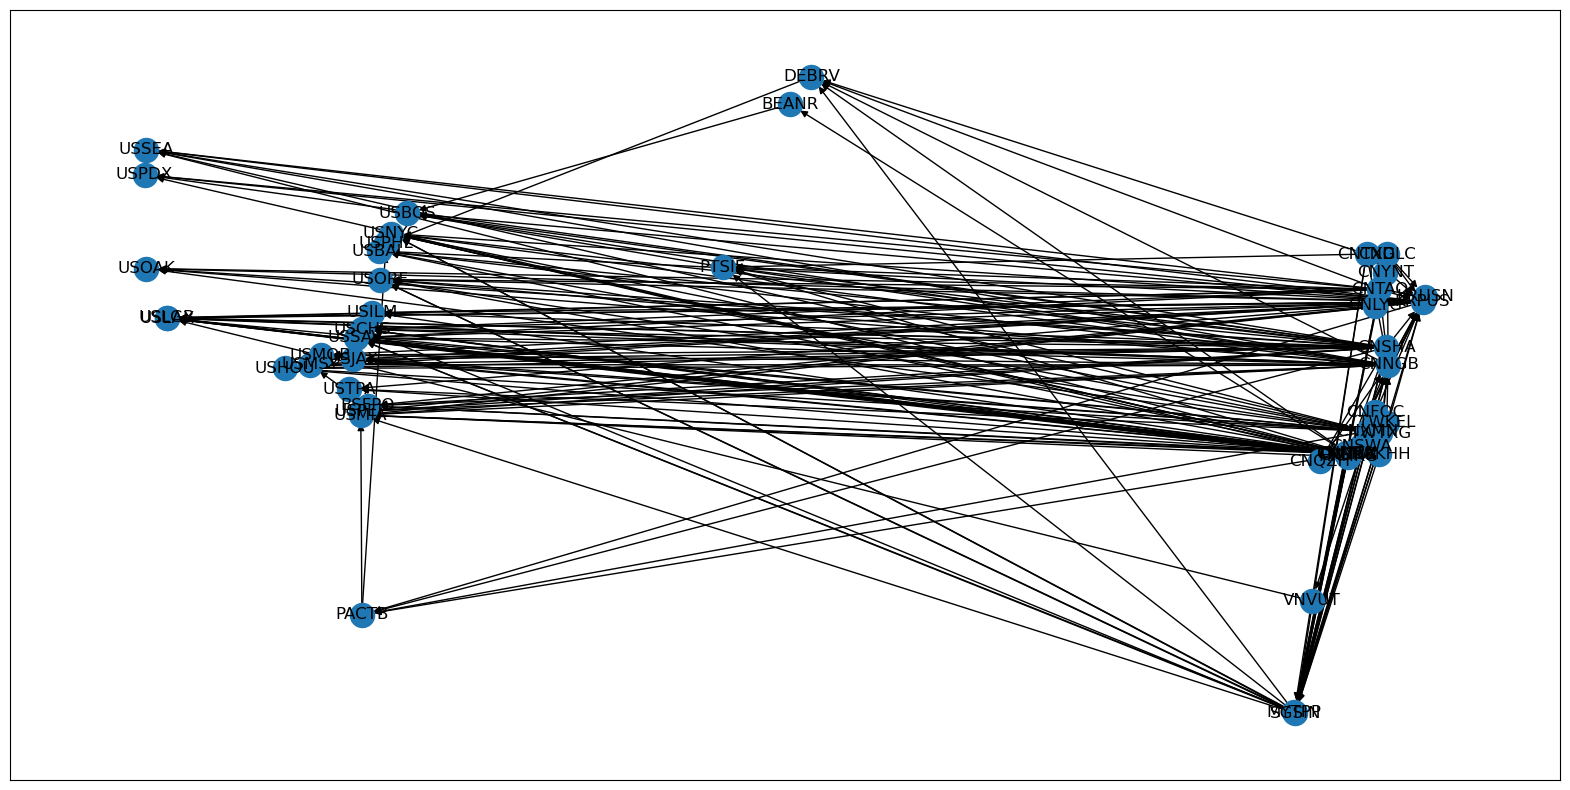

In [5]:
plt.figure(figsize=(20,10))
nx.draw_networkx(G, pos=position_ports)
# plt.savefig("./figure/geo_SA_msc_route.png")

In [6]:
# # Add sea link
# for node, attr in G.nodes(data=True):
#     G.nodes[node]["modality"] = "sea"
    
# for edge in G.edges(data=True):
#     G.edges[edge[0], edge[1]]["modality"] = "sea"

## Add airport data

In [7]:
with open("data_av/routes_flight/graph_networkx_all_air_route.pkl", 'rb') as f:  # notice the r instead of w
    G_loaded_air = pickle.load(f)
    G_air = copy.deepcopy(G_loaded_air)

# Combine Air and Sea

In [8]:
G_air_sea = nx.union(G, G_air)

In [9]:
with open("./graph_networkx_CNHK_USA_ALL_NEW_route_with_sea.pkl", "wb") as f:
    pickle.dump(G_air_sea, f)

In [10]:
list(nx.all_simple_edge_paths(G_air_sea, source="HKG", target="AMS", cutoff=4))

[[('HKG', 'SIN'), ('SIN', 'BKK'), ('BKK', 'DEL'), ('DEL', 'AMS')],
 [('HKG', 'SIN'), ('SIN', 'BKK'), ('BKK', 'ICN'), ('ICN', 'AMS')],
 [('HKG', 'SIN'), ('SIN', 'BKK'), ('BKK', 'PVG'), ('PVG', 'AMS')],
 [('HKG', 'SIN'), ('SIN', 'BKK'), ('BKK', 'BOM'), ('BOM', 'AMS')],
 [('HKG', 'SIN'), ('SIN', 'BKK'), ('BKK', 'KUL'), ('KUL', 'AMS')],
 [('HKG', 'SIN'), ('SIN', 'BKK'), ('BKK', 'NRT'), ('NRT', 'AMS')],
 [('HKG', 'SIN'), ('SIN', 'BKK'), ('BKK', 'CDG'), ('CDG', 'AMS')],
 [('HKG', 'SIN'), ('SIN', 'BKK'), ('BKK', 'HEL'), ('HEL', 'AMS')],
 [('HKG', 'SIN'), ('SIN', 'BKK'), ('BKK', 'AUH'), ('AUH', 'AMS')],
 [('HKG', 'SIN'), ('SIN', 'BKK'), ('BKK', 'LHR'), ('LHR', 'AMS')],
 [('HKG', 'SIN'), ('SIN', 'BKK'), ('BKK', 'AMS')],
 [('HKG', 'SIN'), ('SIN', 'BKK'), ('BKK', 'TPE'), ('TPE', 'AMS')],
 [('HKG', 'SIN'), ('SIN', 'BKK'), ('BKK', 'VIE'), ('VIE', 'AMS')],
 [('HKG', 'SIN'), ('SIN', 'BKK'), ('BKK', 'PEK'), ('PEK', 'AMS')],
 [('HKG', 'SIN'), ('SIN', 'BKK'), ('BKK', 'CAN'), ('CAN', 'AMS')],
 [('HKG', '